## Functions to load and read input data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/carvana-image-masking-challenge/train_masks.zip
/kaggle/input/carvana-image-masking-challenge/29bb3ece3180_11.jpg
/kaggle/input/carvana-image-masking-challenge/train_masks.csv.zip
/kaggle/input/carvana-image-masking-challenge/train.zip
/kaggle/input/carvana-image-masking-challenge/metadata.csv.zip
/kaggle/input/carvana-image-masking-challenge/sample_submission.csv.zip
/kaggle/input/carvana-image-masking-challenge/test.zip
/kaggle/input/carvana-image-masking-challenge/test_hq.zip
/kaggle/input/carvana-image-masking-challenge/train_hq.zip


In [2]:
#importng all the required libraries
import tensorflow as tf
from zipfile import ZipFile 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

In [3]:
#extracting all the contents of zipped file which contains all the train images
train_zip = "/kaggle/input/carvana-image-masking-challenge/train.zip"#address of the input file 
with ZipFile(train_zip, 'r') as zip_: # reading everything in the train folder and extrcting it in output directory
    zip_.extractall('/kaggle/working')

In [4]:
#extracting all the contents of zipped file which contains all the masks of train images
train_mask_zip = "/kaggle/input/carvana-image-masking-challenge/train_masks.zip"
with ZipFile(train_mask_zip, 'r') as zip_: 
    zip_.extractall('/kaggle/working')

In [5]:
print("Train set:  ", len(os.listdir("/kaggle/working/train")))#length of folder extracted above in output
print("Train masks:", len(os.listdir("/kaggle/working/train_masks")))#length of folder extracted above in output

Train set:   5088
Train masks: 5088


In [6]:
car_ids = []
paths = []
for dirname, _, filenames in os.walk('/kaggle/working/train'):
    for filename in filenames:#images in train folder
        path = os.path.join(dirname, filename)    
        paths.append(path)#images address
        
        car_id = filename.split(".")[0]
        car_ids.append(car_id) #id of train images

d = {"id": car_ids, "car_path": paths}
df = pd.DataFrame(data = d)
df = df.set_index('id') # df containing path to each training image and image unique name as index
df

,car_path
id,
154ee2b6d27a_06,/kaggle/working/train/154ee2b6d27a_06.jpg
78bfb9c780db_12,/kaggle/working/train/78bfb9c780db_12.jpg
3afec4b5ac07_05,/kaggle/working/train/3afec4b5ac07_05.jpg
feaf59172a01_07,/kaggle/working/train/feaf59172a01_07.jpg
bad53871c7d9_06,/kaggle/working/train/bad53871c7d9_06.jpg
...,...
a56f923399ca_10,/kaggle/working/train/a56f923399ca_10.jpg
351c583eabd6_04,/kaggle/working/train/351c583eabd6_04.jpg
0d1a9caf4350_15,/kaggle/working/train/0d1a9caf4350_15.jpg


In [7]:
car_ids = []
mask_path = []
for dirname, _, filenames in os.walk('/kaggle/working/train_masks'):
    for filename in filenames: #contents of train_mask folder
        path = os.path.join(dirname, filename)
        mask_path.append(path)  #
        
        car_id = filename.split(".")[0]
        car_id = car_id.split("_mask")[0]
        car_ids.append(car_id)

        
d = {"id": car_ids,"mask_path": mask_path}
mask_df = pd.DataFrame(data = d)
mask_df = mask_df.set_index('id') #containg path to masks of train data and unique id if images as index 
mask_df

,mask_path
id,
fff9b3a5373f_02,/kaggle/working/train_masks/fff9b3a5373f_02_ma...
d1a3af34e674_08,/kaggle/working/train_masks/d1a3af34e674_08_ma...
0ed6904e1004_16,/kaggle/working/train_masks/0ed6904e1004_16_ma...
2cb91c2543fa_15,/kaggle/working/train_masks/2cb91c2543fa_15_ma...
bd8d5780ed04_01,/kaggle/working/train_masks/bd8d5780ed04_01_ma...
...,...
c87688f6960e_10,/kaggle/working/train_masks/c87688f6960e_10_ma...
880ab8468df2_08,/kaggle/working/train_masks/880ab8468df2_08_ma...
40851e617b93_12,/kaggle/working/train_masks/40851e617b93_12_ma...


In [8]:
mask_df["mask_path"][0]

'/kaggle/working/train_masks/fff9b3a5373f_02_mask.gif'

In [9]:
df["mask_path"] = mask_df["mask_path"]#putting image path and mask path in a single dataframe
df

,car_path,mask_path
id,,
154ee2b6d27a_06,/kaggle/working/train/154ee2b6d27a_06.jpg,/kaggle/working/train_masks/154ee2b6d27a_06_ma...
78bfb9c780db_12,/kaggle/working/train/78bfb9c780db_12.jpg,/kaggle/working/train_masks/78bfb9c780db_12_ma...
3afec4b5ac07_05,/kaggle/working/train/3afec4b5ac07_05.jpg,/kaggle/working/train_masks/3afec4b5ac07_05_ma...
feaf59172a01_07,/kaggle/working/train/feaf59172a01_07.jpg,/kaggle/working/train_masks/feaf59172a01_07_ma...
bad53871c7d9_06,/kaggle/working/train/bad53871c7d9_06.jpg,/kaggle/working/train_masks/bad53871c7d9_06_ma...
...,...,...
a56f923399ca_10,/kaggle/working/train/a56f923399ca_10.jpg,/kaggle/working/train_masks/a56f923399ca_10_ma...
351c583eabd6_04,/kaggle/working/train/351c583eabd6_04.jpg,/kaggle/working/train_masks/351c583eabd6_04_ma...
0d1a9caf4350_15,/kaggle/working/train/0d1a9caf4350_15.jpg,/kaggle/working/train_masks/0d1a9caf4350_15_ma...


## functions for preprocessing of data to make it ready for training models

In [10]:
img_size = [64,64]

def data_augmentation(car_img, mask_img):# few data augmentation methods

    if tf.random.uniform(()) > 0.5:#generatin a random condition wih random number between 0 and 1 
        car_img = tf.image.flip_left_right(car_img)#flipping image from left to right
        mask_img = tf.image.flip_left_right(mask_img)#flipping image masks from left to right

    return car_img, mask_img

def preprocessing(car_path, mask_path):
    car_img = tf.io.read_file(car_path) #reading train image path
    car_img = tf.image.decode_jpeg(car_img, channels=3) #coverting from scalar string tensor to  3d uint8
    car_img = tf.image.resize(car_img, img_size) #resizing it ti use it more conviniently 
    car_img = tf.cast(car_img, tf.float32) / 255.0 # normalizing the pixel values between 0 to 1
    
    mask_img = tf.io.read_file(mask_path)#reading mask path
    mask_img = tf.image.decode_jpeg(mask_img, channels=3)
    mask_img = tf.image.resize(mask_img, img_size)
    mask_img = mask_img[:,:,:1]  #taking use of only one channel  
    mask_img = tf.math.sign(mask_img)
    
    
    return car_img, mask_img
def create_dataset(df, train = False):
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values, df["mask_path"].values))#taking path as object
        ds = ds.map(preprocessing, tf.data.AUTOTUNE) #mapping masks to preproessing function
    else:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE) # mapping images to preprocessing function
        ds = ds.map(data_augmentation, tf.data.AUTOTUNE)# mapping images to data_augmemtation function

    return ds

In [11]:
df.columns

Index(['car_path', 'mask_path'], dtype='object')

In [12]:
sh = plt.imread(df["mask_path"][0]).shape # real shape of mask 
mask_h = sh[0]#real height of mask images
mask_w = sh[1]#real width of mask images

In [13]:
mask_h 

1280

In [14]:
train_df, valid_df = train_test_split(df, random_state=42, test_size=.25)# splitting given labelled data into train and valid 
train = create_dataset(train_df, train = True)# train dataset
valid = create_dataset(valid_df)# valid dataset

2022-01-20 10:06:16.898808: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-20 10:06:16.998125: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-20 10:06:16.998866: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-20 10:06:17.001685: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [15]:
TRAIN_LENGTH = len(train_df)#length if train dataset
BATCH_SIZE = 16 # batch size to train images 
BUFFER_SIZE = 1000 #

In [16]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat() # shuffing and batching records
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE) #fetching data to train
valid_dataset = valid.batch(BATCH_SIZE)

In [17]:
def display(display_list): # function for visualizing  images
    plt.figure(figsize=(10, 10)) #size of plot

    title = ['Input Image', 'True Mask', 'Predicted Mask'] #possible images

    for i in range(len(display_list)): 
        plt.subplot(1, len(display_list), i+1) #image, true_mask, predicted_mask
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i])) #function to show images
        plt.axis('off')
    plt.show()

2022-01-20 10:06:19.756901: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(64, 64, 3)


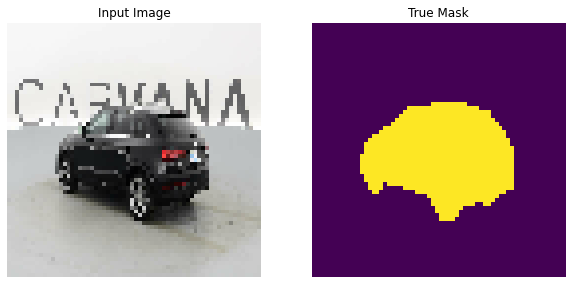

(64, 64, 3)


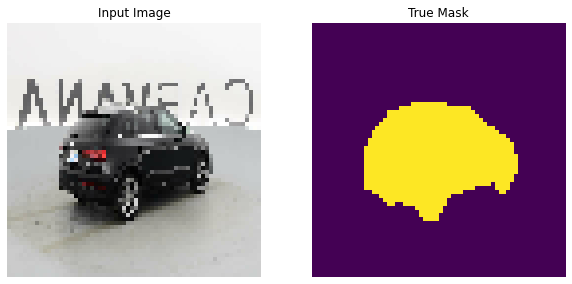

(64, 64, 3)


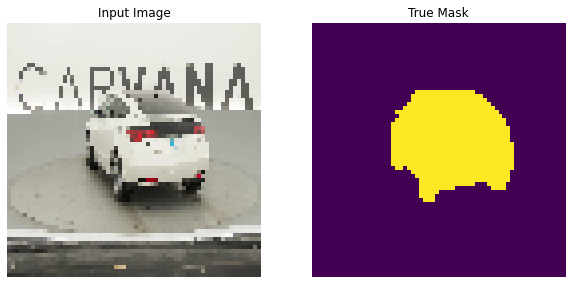

(64, 64, 3)


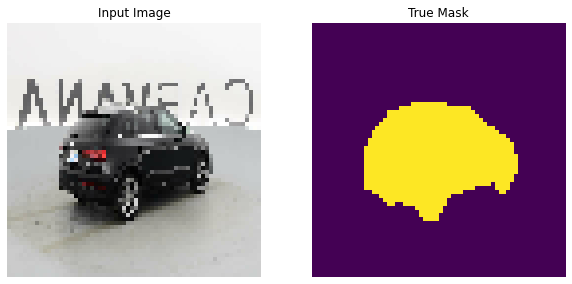

(64, 64, 3)


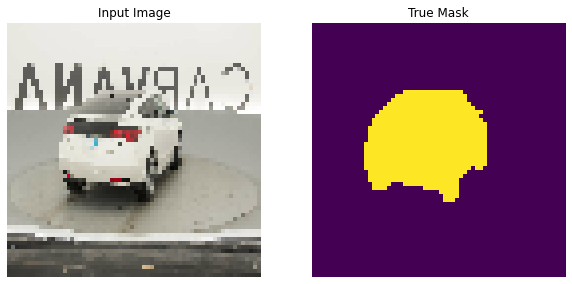

(64, 64, 3)


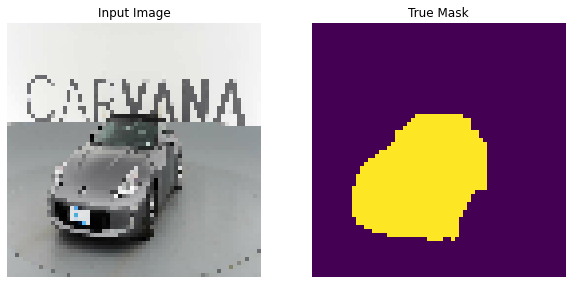

(64, 64, 3)


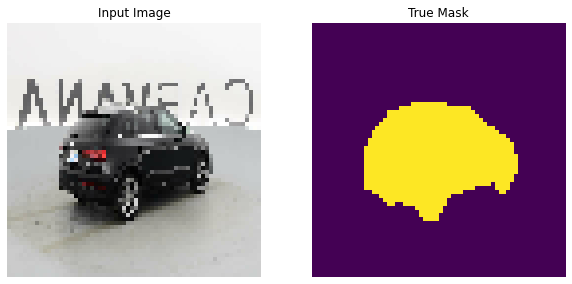

(64, 64, 3)


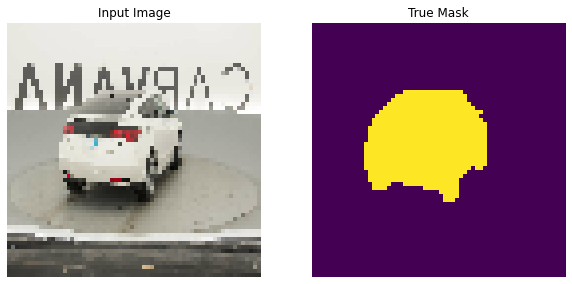

(64, 64, 3)


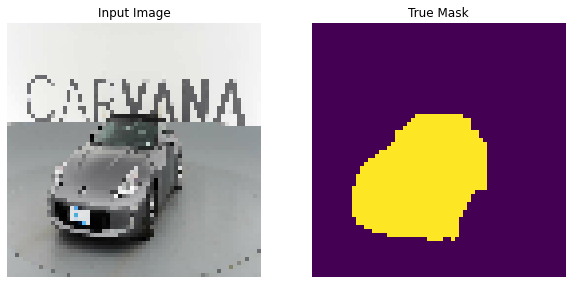

(64, 64, 3)


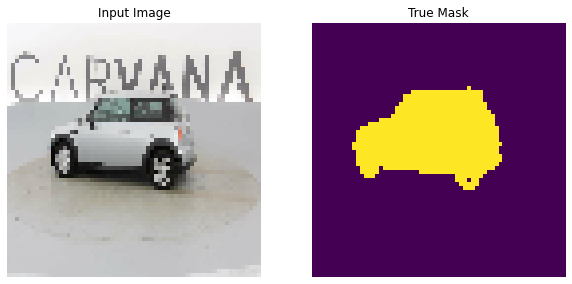

In [18]:
for i in range(5):
   for image, mask in train.take(i): #taking i records
        sample_image, sample_mask = image, mask
        print(sample_image.shape)
        display([sample_image, sample_mask]) #visualizing using above function

## creating model

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras.losses import binary_crossentropy
from sklearn.model_selection import train_test_split

UNet model is particularly good at image segmentation and we are going to make it from scratch.
we have to subpart it in two parts. Encoder which will be used for downsampling and decoder will be used for upsampling.

The encoder block follows a pattern of using convolution layer two times on the input data and then use maxpooling layer to decrease parameters and computational cost.
We can use batch normalization in between layers to regularize their input 

In [20]:

def EncoderMiniBlock(inputs, n_filters=32, dropout_prob=0.3, max_pooling=True):
    """
    This block uses multiple convolution layers, max pool, relu activation to create an architecture for learning. 
    Dropout can be added for regularization to prevent overfitting. 
    The block returns the activation values for next layer along with a skip connection which will be used in the decoder
    """
    # Add 2 Conv Layers with relu activation and HeNormal initialization using TensorFlow 
    # Proper initialization prevents from the problem of exploding and vanishing gradients 
    # 'Same' padding will pad the input to conv layer such that the output has the same height and width (hence, is not reduced in size) 
    conv = Conv2D(n_filters, 
                  3,   # Kernel size   
                  activation='relu',
                  padding='same',
                  kernel_initializer='HeNormal')(inputs)
    conv = Conv2D(n_filters, 
                  3,   # Kernel size
                  activation='relu',
                  padding='same',
                  kernel_initializer='HeNormal')(conv)
    
    # Batch Normalization will normalize the output of the last layer based on the batch's mean and standard deviation
    conv = BatchNormalization()(conv, training=False)

    # In case of overfitting, dropout will regularize the loss and gradient computation to shrink the influence of weights on output
    if dropout_prob > 0:     
        conv = tf.keras.layers.Dropout(dropout_prob)(conv)

    # Pooling reduces the size of the image while keeping the number of channels same
    # Pooling has been kept as optional as the last encoder layer does not use pooling (hence, makes the encoder block flexible to use)
    # Below, Max pooling considers the maximum of the input slice for output computation and uses stride of 2 to traverse across input image
    if max_pooling:
        next_layer = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv)    
    else:
        next_layer = conv

    # skip connection (without max pooling) will be input to the decoder layer to prevent information loss during transpose convolutions      
    skip_connection = conv
    
    return next_layer, skip_connection



Using decoder block to upsample images by using trans convolution on the provided input and merging it with corresponding downsampled layer then applying convolution two times.  

In [21]:
def DecoderMiniBlock(prev_layer_input, skip_layer_input, n_filters=32):
    """
    Decoder Block first uses transpose convolution to upscale the image to a bigger size and then,
    merges the result with skip layer results from encoder block
    Adding 2 convolutions with 'same' padding helps further increase the depth of the network for better predictions
    The function returns the decoded layer output
    """
    # Start with a transpose convolution layer to first increase the size of the image
    up = Conv2DTranspose(
                 n_filters,
                 (3,3),    # Kernel size
                 strides=(2,2),
                 padding='same')(prev_layer_input)

    # Merge the skip connection from previous block to prevent information loss
    merge = concatenate([up, skip_layer_input], axis=3)
    
    # Add 2 Conv Layers with relu activation and HeNormal initialization for further processing
    # The parameters for the function are similar to encoder
    conv = Conv2D(n_filters, 
                 3,     # Kernel size
                 activation='relu',
                 padding='same',
                 kernel_initializer='HeNormal')(merge)
    conv = Conv2D(n_filters,
                 3,   # Kernel size
                 activation='relu',
                 padding='same',
                 kernel_initializer='HeNormal')(conv)
    return conv

now that we have coded basic blocks, we need to compile unet, that is appropriate for our dataset

In [22]:
#3.3 - Compile U-Net Blocks
def UNetCompiled(input_size=(128, 128, 3), n_filters=16, n_classes=1):
    inputs = Input(input_size)
    
    # Encoder includes multiple convolutional mini blocks with different maxpooling, dropout and filter parameters
    # Observe that the filters are increasing as we go deeper into the network which will increasse the # channels of the image 
    cblock1 = EncoderMiniBlock(inputs, n_filters,dropout_prob=0, max_pooling=True)
    cblock2 = EncoderMiniBlock(cblock1[0],n_filters*2,dropout_prob=0, max_pooling=True)
    cblock3 = EncoderMiniBlock(cblock2[0], n_filters*4,dropout_prob=0, max_pooling=True)
    cblock4 = EncoderMiniBlock(cblock3[0], n_filters*8,dropout_prob=0.3, max_pooling=True)
    cblock5 = EncoderMiniBlock(cblock4[0], n_filters*16, dropout_prob=0.3, max_pooling=False) 
    
    # Decoder includes multiple mini blocks with decreasing number of filters
    # Observe the skip connections from the encoder are given as input to the decoder
    # Recall the 2nd output of encoder block was skip connection, hence cblockn[1] is used
    ublock6 = DecoderMiniBlock(cblock5[0], cblock4[1],  n_filters * 8)
    ublock7 = DecoderMiniBlock(ublock6, cblock3[1],  n_filters * 4)
    ublock8 = DecoderMiniBlock(ublock7, cblock2[1],  n_filters * 2)
    ublock9 = DecoderMiniBlock(ublock8, cblock1[1],  n_filters)
 
    # Complete the model with 1 3x3 convolution layer (Same as the prev Conv Layers)
    # Followed by a 1x1 Conv layer to get the image to the desired size. 
    # Observe the number of channels will be equal to number of output classes
    conv9 = Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(ublock9)

    conv10 = Conv2D(n_classes, 1, padding='same')(conv9)
    
    # Define the model
    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model



In [23]:
#compiling unet model
unet = UNetCompiled(input_size=(64,64,3), n_filters=16, n_classes=1)


In [24]:
from keras.losses import binary_crossentropy
import keras.backend as K

#metric and loss function to be used for training model
def dice_coeff(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score


def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss


def bce_dice_loss(y_true, y_pred):
    loss = binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

In [25]:
unet.compile(optimizer=tf.keras.optimizers.Adam(), 
             loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [26]:
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [27]:
#callbacks to apply when training the model
#early stopping if performance does not improve within given patience parameter
#model checkpoint for saving weights of the model which las performed better 
# reducing learning rate in order to find the optimal solution 
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [28]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model-tgs-salt.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [29]:
hist = unet.fit(train_dataset, batch_size=16, epochs=15,steps_per_epoch=STEPS_PER_EPOCH,callbacks = callbacks, validation_data=valid_dataset)

Epoch 1/15


2022-01-20 10:06:37.380288: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 472 of 1000
2022-01-20 10:06:47.376219: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 958 of 1000
2022-01-20 10:06:48.155658: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.
2022-01-20 10:06:49.299712: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


238/238 [==============================] - 114s 358ms/step - loss: 0.3173 - accuracy: 0.8800 - val_loss: 0.2098 - val_accuracy: 0.9092

Epoch 00001: val_loss improved from inf to 0.20983, saving model to model-tgs-salt.h5
Epoch 2/15
238/238 [==============================] - 29s 123ms/step - loss: 0.1613 - accuracy: 0.9425 - val_loss: 0.1326 - val_accuracy: 0.9501

Epoch 00002: val_loss improved from 0.20983 to 0.13260, saving model to model-tgs-salt.h5
Epoch 3/15
238/238 [==============================] - 29s 122ms/step - loss: 0.1114 - accuracy: 0.9579 - val_loss: 0.0724 - val_accuracy: 0.9709

Epoch 00003: val_loss improved from 0.13260 to 0.07241, saving model to model-tgs-salt.h5
Epoch 4/15
238/238 [==============================] - 29s 120ms/step - loss: 0.2007 - accuracy: 0.9250 - val_loss: 0.2006 - val_accuracy: 0.9213

Epoch 00004: val_loss did not improve from 0.07241
Epoch 5/15
238/238 [==============================] - 29s 120ms/step - loss: 0.1593 - accuracy: 0.9353 - val_

In [30]:
#loading the weight of model which last performed  best
unet.load_weights("./model-tgs-salt.h5")

In [31]:
#delete train_df,valid_df, train, valid, df, mask_df to free up memory 
import gc
#del train_df
gc.collect()

23983

In [32]:
del mask_df
gc.collect()

21

In [33]:
del df
gc.collect()

21

In [34]:
del train
gc.collect()

21

In [35]:
del valid
gc.collect()

21

In [36]:
del valid_df
gc.collect()

21

In [37]:
def vis_compare(dataset=valid_dataset,num_case=1):
       
    for sample in dataset.take(1):
        image, label = sample[0].numpy(), sample[1].numpy()
        print(image.shape)
        print(label.shape)
    preds=unet.predict(image)#predicting mask of valid dataset 
    preds = np.squeeze(preds, axis =-1)
    print(preds.shape)
    if num_case>1:
        cases=[j for j in np.random.choice(image.shape[0],size=num_case,replace=False)]   #choosing random images
        for i in cases:
            truth=(image[i],label[i])
            pred=(image[i],preds[i])
            print(f"case_number_{i}")
            fig, arr = plt.subplots(1, 3, figsize=(15, 15))
            arr[0].imshow(image[i])
            arr[0].set_title('Processed Image')
            arr[1].imshow(label[i])
            arr[1].set_title('Actual Masked Image ')
            arr[2].imshow(preds[i])
            arr[2].set_title('Predicted Masked Image ')
    else:
        truth=(image[0],label[0])
        pred=(image[0],preds[0])
        display([image[0],label[0],preds[0]])
            
    
    
    plt.show()

(16, 64, 64, 3)
(16, 64, 64, 1)
(16, 64, 64)
case_number_15
case_number_8


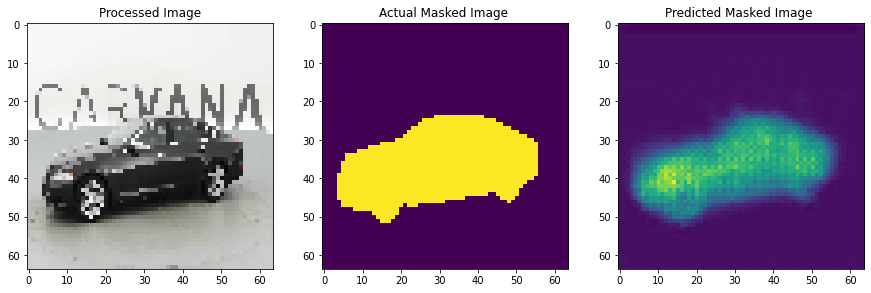

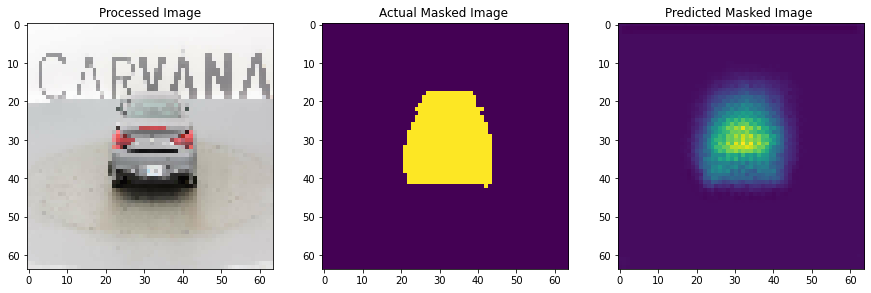

In [38]:
vis_compare(dataset=valid_dataset,num_case=2)

In [39]:
#for test data
test_zip = "/kaggle/input/carvana-image-masking-challenge/test.zip"#path for test data
with ZipFile(test_zip, 'r') as zip_: 
    zip_.extractall('/kaggle/working')
    

In [40]:
car_ids = []
paths = []
for dirname, _, filenames in os.walk('/kaggle/working/test'):
    for filename in filenames:
        path = os.path.join(dirname, filename)    
        paths.append(path)
        
        car_id = filename.split(".")[0]
        car_ids.append(car_id)

d = {"id": car_ids, "car_path": paths}
df = pd.DataFrame(data = d)
df = df.set_index('id')
df

,car_path
id,
02b33b412bde_15,/kaggle/working/test/02b33b412bde_15.jpg
24d3b6153fe7_03,/kaggle/working/test/24d3b6153fe7_03.jpg
62eb96adb87f_03,/kaggle/working/test/62eb96adb87f_03.jpg
e24ee4eccccf_05,/kaggle/working/test/e24ee4eccccf_05.jpg
2ef2b5949b6d_02,/kaggle/working/test/2ef2b5949b6d_02.jpg
...,...
3df59244b0b8_09,/kaggle/working/test/3df59244b0b8_09.jpg
1c02d4ff189f_07,/kaggle/working/test/1c02d4ff189f_07.jpg
8dca6df26c58_08,/kaggle/working/test/8dca6df26c58_08.jpg


In [41]:
img_size = [64,64]


def preprocessing(car_path): #preprocessing test data as did to train data
    car_img = tf.io.read_file(car_path) 
    car_img = tf.image.decode_jpeg(car_img, channels=3)
    car_img = tf.image.resize(car_img, img_size)
    car_img = tf.cast(car_img, tf.float32) / 255.0
    return car_img
def create_dataset(df, train = False): #dataset for input of model
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["car_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)

    return ds
test = create_dataset(df)




In [42]:
BATCH_SIZE = 16
test_dataset = test.batch(BATCH_SIZE)

In [43]:
len(df)

100064

(64, 64, 3)
1


2022-01-20 10:17:58.169055: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


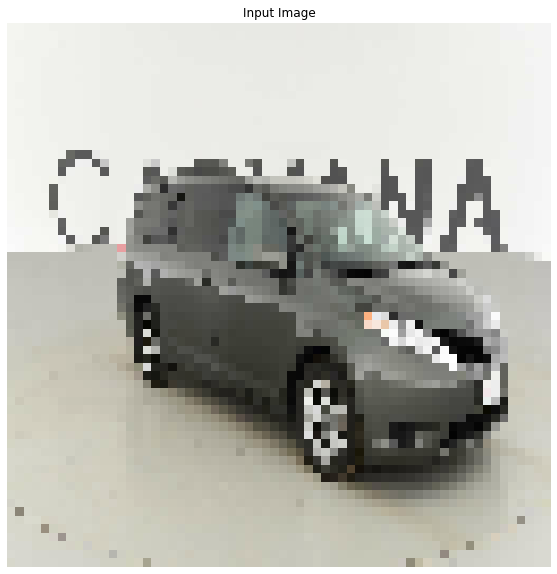

(64, 64, 3)
2


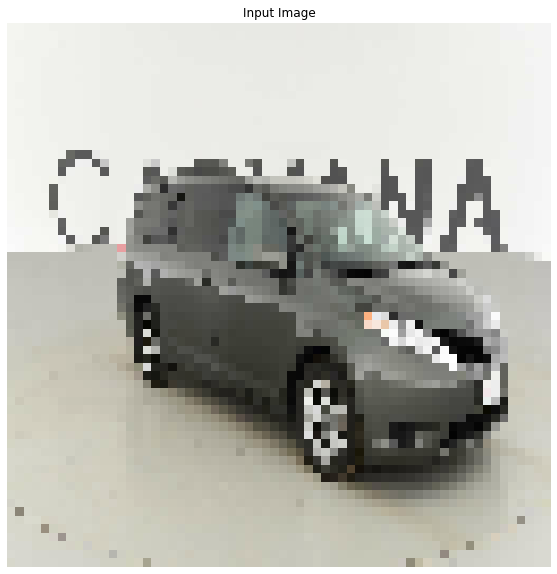

(64, 64, 3)
2


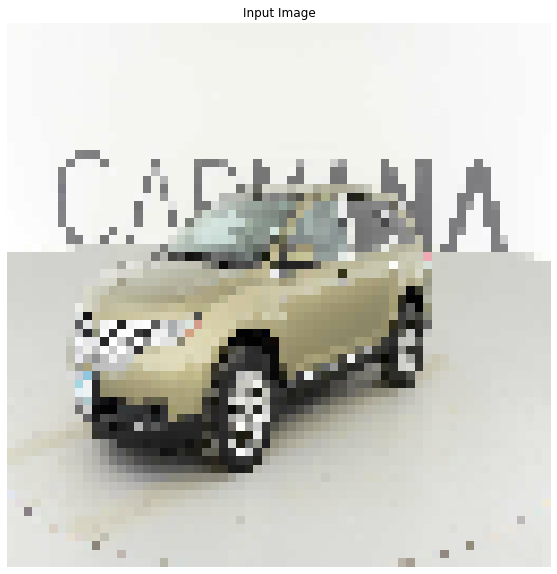

(64, 64, 3)
3


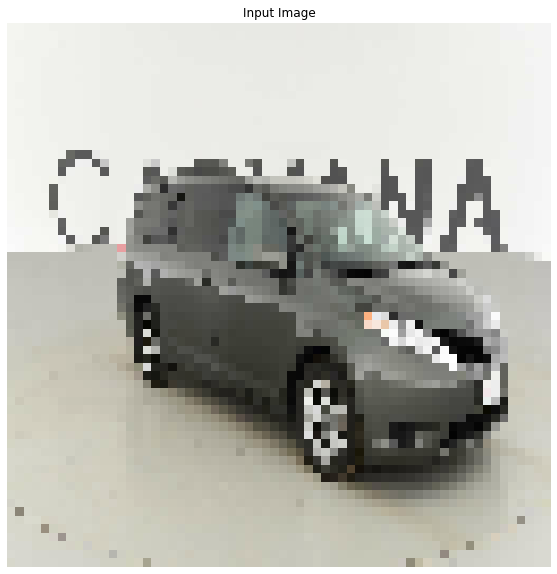

(64, 64, 3)
3


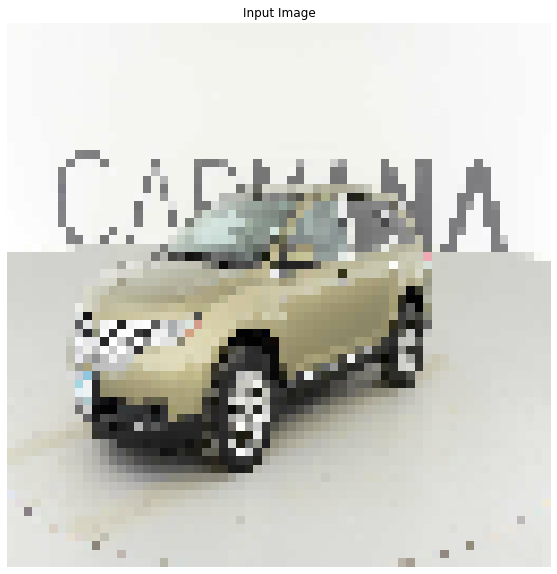

(64, 64, 3)
3


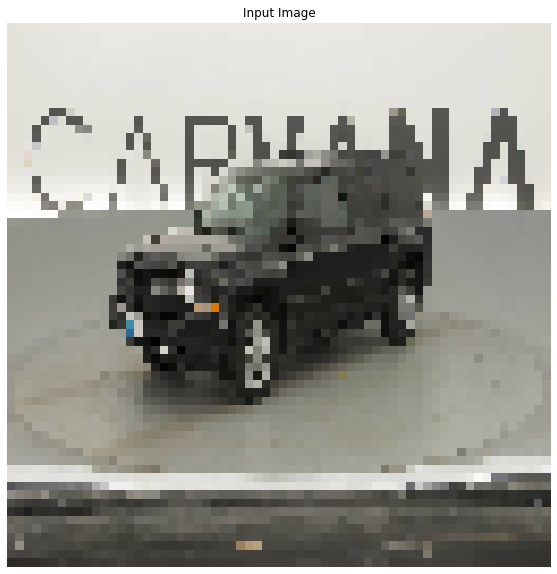

(64, 64, 3)
4


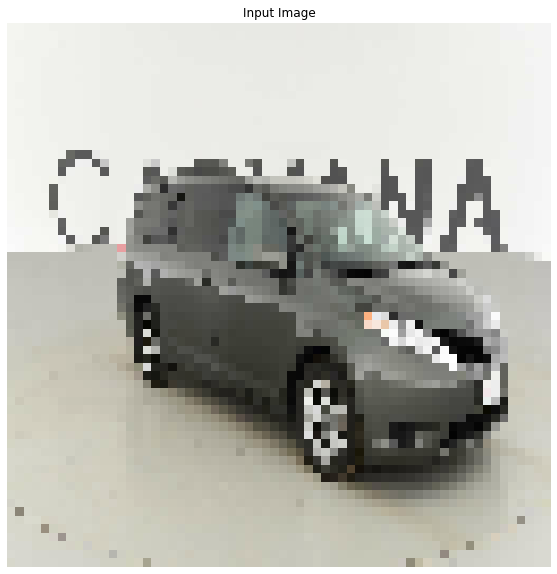

(64, 64, 3)
4


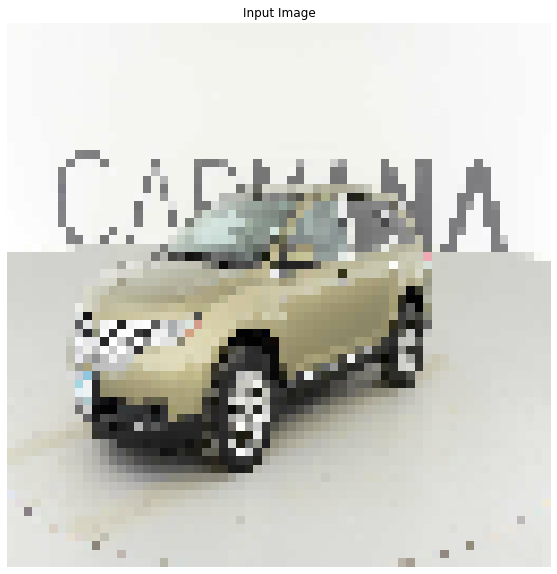

(64, 64, 3)
4


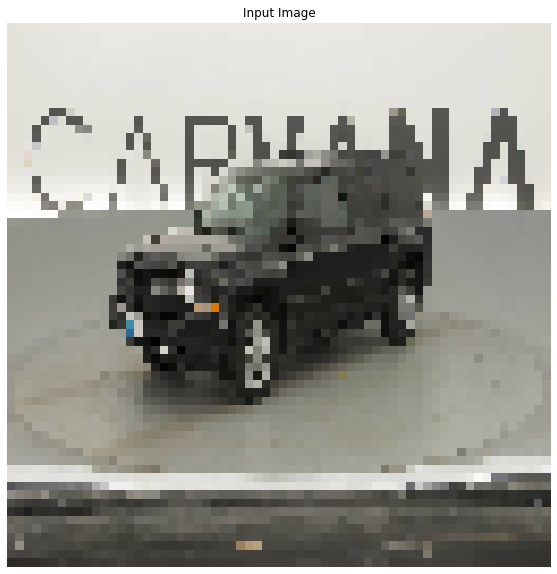

(64, 64, 3)
4


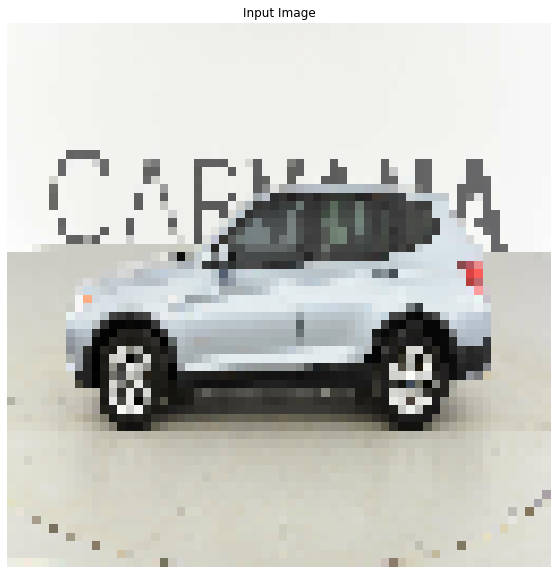

In [44]:
#visualizing test images
for i in range(5):
   for image  in test.take(i):
        print(image.shape)
        print(i)
        sample_image= image
        display([sample_image])

In [45]:
preds = unet.predict(test_dataset)

2022-01-20 10:27:20.750063: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1639448576 exceeds 10% of free system memory.


In [46]:
 preds.shape

(100064, 64, 64, 1)

In [47]:
from tqdm import tqdm
import cv2

In [48]:
 def run_length_encode(mask): #function to change the predicted masks into wanted submission type according to instructions  
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    inds = mask.flatten()#making it scalar
    runs = np.where(inds[1:] != inds[:-1])[0] + 2
    runs[1::2] = runs[1::2] - runs[:-1:2]
    rle = ' '.join([str(r) for r in runs])
    return rle


rles = []   

#preds_o=preds.max(axis=3)

preds = np.squeeze(preds, axis=3)
for pred in preds:
    prob = cv2.resize(pred, (mask_w, mask_h))
    mask = prob > 0.5
    rle = run_length_encode(mask)
    rles.append(rle)

print("Generating submission file...")


Generating submission file...


In [49]:
len(rles)

100064

In [50]:
dfs = pd.DataFrame({'img': df.index.values + ".jpg", 'rle_mask': rles})#creating dataframe of image id and predicted masks as columns 


In [51]:
dfs.to_csv('submission_6.csv.gz', index=False, compression ='gzip' )#converting to compressed csv file 

In [52]:
pd.read_csv("./submission_6.csv.gz")

,img,rle_mask
0,02b33b412bde_15.jpg,689290 11 691202 21 693115 31 695029 39 696944...
1,24d3b6153fe7_03.jpg,781630 2 783546 7 785462 11 787378 15 789294 2...
2,62eb96adb87f_03.jpg,538220 13 540131 35 542043 50 543956 59 545870...
3,e24ee4eccccf_05.jpg,689711 16 691622 35 693534 50 695388 35 695447...
4,2ef2b5949b6d_02.jpg,883251 5 883374 2 885152 26 885288 10 887059 4...
...,...,...
100059,3df59244b0b8_09.jpg,798859 22 800773 36 802688 42 804602 48 806517...
100060,1c02d4ff189f_07.jpg,538068 14 539976 35 541783 12 541882 60 543689...
100061,8dca6df26c58_08.jpg,802758 3 804671 25 806474 3 806585 71 808389 1...
100062,881a4aa969ea_14.jpg,589619 3 589735 15 591479 14 591515 31 591647 ...
